# Тестовое задание
#### Выполнил: Нистратов Д.Г. гр.9383 

## Цель работы 
Использованием библиотек Python для кластеризации музыкальных сигналов.
## Задачи лабораторной работы
1. Индивидуальное творческое соревнование.
2. Самостоятельное освоение одного из важных методов обучения без учителя — обучение без учителя.
3. Практическое применение дискретного преобразования Фурье для извлечения признаков обучения.
4. Использованием библиотек Python для кластеризации музыкальных сигналов.

##  Кластеризация

### Загрузка аудио сигнала

In [1]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft
from sklearn.cluster import KMeans
import os

def read_mp3(name):
    sound = AudioSegment.from_mp3(name)

    samples = np.array(sound.get_array_of_samples())

    signal = (samples[0::2] + samples[1::2])/2
    return signal

names = []
sounds = []

for filename in sorted(os.listdir('./mp3/')) :
    if filename.endswith(".mp3"):
        sounds.append(read_mp3(os.path.join('./mp3/', filename)))
        names.append(filename)

framerate = 44100

### Обработка сигнала

Функция split - разбивает сигнал на временные интервалы (кадры) одинаковой длины N отсчетов sm(i), где m— номер кадра.

Функция window - для каждого подходящего кадра проводится предварительное оконное преобразование, чтобы уменьшить искажения при последующем вычислении ДПФ (модель сигнала):
ˆm(i) = sm(i)w(i).
В качестве оконной функции w(i) используется функции Хемминга.

Функция dft и ampSpectrum - для каждого подходящего кадра ˆm вычисляется амплитудный спектр Sm(k).

Функция averageSpec - формирует вектор среднего спектра по всем подходящим кадрам.

In [2]:
def split(signal):
    split_signal  = np.array_split(signal, N)
    
    return split_signal 

In [3]:
def window(split_signal):
    avg = np.average(np.abs(split_signal))
    for i in range(len(split_signal)):
        avg_i = np.average(np.abs(split_signal [i]))
        if(avg_i < avg/2): 
            split_signal [i] = np.zeros(len(split_signal[i]))
        else:
            split_signal [i] = np.hamming(len(split_signal[i]))*split_signal[i]
    return split_signal  

In [4]:
def dft(signal_parts):
    dft_parts = []
    for part in signal_parts:
        dft_parts.append(abs(np.fft.rfft(part, n = N)))
    return dft_parts

In [5]:
def ampSpectrum(dft_parts):
    spectrum = []
    for interaval in spectrum:
        spectrum.append(abs(interval[:len(interval//2)]))    
    return spectrum

In [6]:
def averageSpec(spectrum):
    average = []
    for spec in spectrum:
        average.append(np.average(spec))
    return average

### Кластеризация

Произведем обработку сигнала для каждого звука.

In [7]:
klaster = []

N = 128

for signal in sounds:
    split_signal = split(signal)
    split_signal = window(split_signal)
    spectrum = dft(split_signal)
    average = averageSpec(spectrum)
    klaster.append(average)

Для кластеризации воспользуемся библиотекой sklearn

In [8]:
from sklearn.decomposition import PCA

klaster_array = np.array(klaster)

Функция выполняет седующие шаги :
1. Задаем количество кластеров, k (положим k = 5).
2. Инициализация центроидов. Случайным образом выбираются k точек данных и объявляются центрами кластеров (центроидами). Здесь возможны различные стратегии выбора (творческий выбор).
3. Разбиение на кластеры. Для каждого элемента набора определяется ближайший к нему центр кластера (расстояния измеряются в метрике Евклида).
4. Вычисление новых центроидов Новые центроиды — это вектора, компоненты которыхпредставляют собой средние значения соответствующих признаков, вычисленные по всем элементам соответствующего кластера.
5. Повторяем шаги 3 — 4

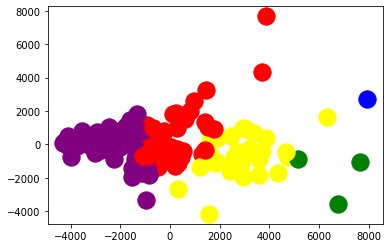

In [9]:
k = 5
colors = ['Green', 'Red', 'Blue', 'Yellow', 'Purple']
kmeans = KMeans(n_clusters=k, random_state=0).fit(klaster_array)

cluster = [[], [], [], [], []]
reduced_data = PCA(n_components=2).fit_transform(klaster)
for item, label in zip(reduced_data, kmeans.labels_):
    plt.scatter(item[0], item[1], s=300, color=colors[label])
    cluster[label].append(item)

###  Метрика качества


Метрика Компактность кластеров (Cluster Cohesion, CC): чем ближе друг к другу находятся объекты
внутри кластеров, тем лучше разделение.
$CC = \frac{1}{k} \sum_{j = 1}^{k}\sum_{k = 1}^{C}\left | x_{ij} - \bar{x}_{j} \right |^{2}$

где
k — число кластеров,
|Cj |— число элементов в j-ом кластере,
xij — i-й элемент j-го кластера,
¯j — центроид j-го кластера.

In [10]:
cc = 0
for label in range(k):
    current_cluster = list(filter(lambda x: x[1] == label, list(zip(klaster, kmeans.labels_))))
    for cluster in current_cluster:
        cc += np.linalg.norm(cluster[0] - kmeans.cluster_centers_[label])**2
metr = cc/k

metr

605641366.8845078